In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Проанализируйте исходные данные, при необходимости заполните пропуски или удалить не важную информацию. Категориальные признаки замените на числовые

In [4]:
df = pd.read_csv('diabetes.csv')

print(df.isnull().sum())

print(df.head())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 3. Выделите матрицу признаков X и вектор меток Y

In [5]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

### 4. Разделите данные на обучающую и тестовую выборки

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 5. На обучающей выборке получите модели дерева решений и k-ближайших  соседей, рассчитайте точность моделей.

In [7]:
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

tree.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

tree_preds = tree.predict(X_test)
knn_preds = knn.predict(X_test)

tree_accuracy = accuracy_score(Y_test, tree_preds)
knn_accuracy = accuracy_score(Y_test, knn_preds)

print(f"Accuracy of decision tree: {tree_accuracy}")
print(f"Accuracy of k-NN: {knn_accuracy}")

Accuracy of decision tree: 0.7402597402597403
Accuracy of k-NN: 0.6623376623376623


### 6. Подберите наилучшие параметры моделей

In [8]:

tree_params = {'max_depth': range(1, 10)}
knn_params = {'n_neighbors': range(1, 10)}

tree_search = GridSearchCV(tree, tree_params, cv=5)
knn_search = GridSearchCV(knn, knn_params, cv=5)

tree_search.fit(X_train, Y_train)
knn_search.fit(X_train, Y_train)

print(f"Best parameters for decision tree: {tree_search.best_params_}")
print(f"Best parameters for k-NN: {knn_search.best_params_}")

Best parameters for decision tree: {'max_depth': 3}
Best parameters for k-NN: {'n_neighbors': 8}


### 7. Рассчитайте матрицу ошибок для каждой модели

In [9]:
tree_confusion = confusion_matrix(Y_test, tree_preds)
knn_confusion = confusion_matrix(Y_test, knn_preds)

print("Confusion matrix for Decision Tree:")
print("-------------------------------")
print(f"True Positives: {tree_confusion[0][0]}")
print(f"False Positives: {tree_confusion[0][1]}")
print(f"False Negatives: {tree_confusion[1][0]}")
print(f"True Negatives: {tree_confusion[1][1]}")
print("\n")

print("Confusion matrix for k-NN:")
print("-------------------------------")
print(f"True Positives: {knn_confusion[0][0]}")
print(f"False Positives: {knn_confusion[0][1]}")
print(f"False Negatives: {knn_confusion[1][0]}")
print(f"True Negatives: {knn_confusion[1][1]}")


Confusion matrix for Decision Tree:
-------------------------------
True Positives: 74
False Positives: 25
False Negatives: 15
True Negatives: 40


Confusion matrix for k-NN:
-------------------------------
True Positives: 70
False Positives: 29
False Negatives: 23
True Negatives: 32


### 8. Выберите лучшую модель

In [10]:
best_model = tree if tree_accuracy > knn_accuracy else knn
print(f"Best model is: {best_model}")

Best model is: DecisionTreeClassifier()


In [11]:
tree_preds = tree_search.predict(X_test)
knn_preds = knn_search.predict(X_test)

tree_search_accuracy = accuracy_score(Y_test, tree_preds)
knn_search_accuracy = accuracy_score(Y_test, knn_preds)

print(f"Accuracy of decision tree: {tree_search_accuracy}")
print(f"Accuracy of k-NN: {knn_search_accuracy}")
best_model = tree_search if tree_search_accuracy > knn_search_accuracy else knn_search
print(f"Best model is: {best_model.best_estimator_}")

Accuracy of decision tree: 0.7597402597402597
Accuracy of k-NN: 0.7467532467532467
Best model is: DecisionTreeClassifier(max_depth=3)


# 4 Лаба

### Рассчитайте точность на обучающих и тестовых данных:

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [13]:
model = LogisticRegression()
model.fit(X_train, Y_train)

d:\Labs\Course 3\Term 2\Machine learning methods\04\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
print("Правильность на обучающем наборе: {:.2f}".format(model.score(X_train, Y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(model.score(X_test, Y_test)))

Правильность на обучающем наборе: 0.77
Правильность на тестовом наборе: 0.75


### Измените в модели параметр   регуляризации   С, по умолчанию С=1, пересчитайте с С= 100 и С= 0,01. Вновь выведите правильность на  обучающем и тестовом наборах. Сделайте выводы.

Чем меньше значение C, тем сильнее регуляризация. Это помогает предотвратить переобучение модели, добавляя штраф за слишком большие веса.

In [15]:
for C in [100, 0.01]:
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, Y_train)
    print(f"\nПри C={C}:")
    print("Правильность на обучающем наборе: {:.2f}".format(model.score(X_train, Y_train)))
    print("Правильность на тестовом наборе: {:.2f}".format(model.score(X_test, Y_test)))


При C=100:
Правильность на обучающем наборе: 0.77
Правильность на тестовом наборе: 0.75

При C=0.01:
Правильность на обучающем наборе: 0.77
Правильность на тестовом наборе: 0.73


# Добавьте в модель L2-регуляризацию, по умолчанию используется L1-регуляризация: LogisticRegression(penalty='l2', C=0.1)


###  Обучите на своих данных модель метода опорных векторов SVC().

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Модель метода опорных векторов
model_SVC = SVC()
model_SVC.fit(X_train, Y_train)

# Точность на обучающих и тестовых данных
print("Правильность на обучающем наборе: {:.2f}".format(model_SVC.score(X_train, Y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(model_SVC.score(X_test, Y_test)))

Правильность на обучающем наборе: 0.77
Правильность на тестовом наборе: 0.77


Чем ниже гамма, тем больше элементов, даже тех, которые достаточно далеки от разделяющей гиперплоскости, принимают участие в процессе выбора идеальной разделяющей гиперплоскости

In [18]:
SVC_params = {"C": [0.1, 1, 10], "gamma": [0.2,0.6, 1]}
SVC_grid = GridSearchCV(model_SVC, SVC_params, cv=5, n_jobs=-1)
SVC_grid.fit(X_train, Y_train)

print("Наилучший результат GridSearchCV: {:.2f}".format(SVC_grid.best_score_))
print("Наилучшие параметры: ", SVC_grid.best_params_)

# При правильной настройке C и gamma можно добиться оптимального
# результата, который построит более линейную гиперплоскость, игнорирующую
# выбросы, и, следовательно, более обобщающую.

# Модель с наилучшими параметрами
best_model = SVC(**SVC_grid.best_params_)
best_model.fit(X_train, Y_train)

Наилучший результат GridSearchCV: 0.65
Наилучшие параметры:  {'C': 0.1, 'gamma': 0.2}


SVC(C=0.1, gamma=0.2)

In [19]:
# Точность этой модели на обучающих и тестовых данных
print("\nПравильность на обучающем наборе: {:.2f}".format(best_model.score(X_train, Y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(best_model.score(X_test, Y_test)))


Правильность на обучающем наборе: 0.65
Правильность на тестовом наборе: 0.64


In [20]:
# Метрики качества и матрицу ошибок для наилучшей модели
y_pred = best_model.predict(X_test)
print("\nМетрики качества для наилучшей модели SVC:")
print("Точность: {:.2f}".format(accuracy_score(Y_test, y_pred)))
print("Полнота: {:.2f}".format(recall_score(Y_test, y_pred)))
print("Точность: {:.2f}".format(precision_score(Y_test, y_pred)))
print("Матрица ошибок:")
print(confusion_matrix(Y_test, y_pred))


Метрики качества для наилучшей модели SVC:
Точность: 0.64
Полнота: 0.00
Точность: 0.00
Матрица ошибок:
[[99  0]
 [55  0]]


d:\Labs\Course 3\Term 2\Machine learning methods\04\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.tree import DecisionTreeClassifier
# Модель дерева решений
model_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
model_tree.fit(X_train, Y_train)

# Точность на обучающих и тестовых данных
print("Правильность на обучающем наборе (дерево решений): {:.2f}".format(model_tree.score(X_train, Y_train)))
print("Правильность на тестовом наборе (дерево решений): {:.2f}".format(model_tree.score(X_test, Y_test)))

# Модель K-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

# Рассчитайте точность на обучающих и тестовых данных
print("Правильность на обучающем наборе (K-ближайших соседей): {:.2f}".format(model_knn.score(X_train, Y_train)))
print("Правильность на тестовом наборе (K-ближайших соседей): {:.2f}".format(model_knn.score(X_test, Y_test)))

Правильность на обучающем наборе (дерево решений): 0.78
Правильность на тестовом наборе (дерево решений): 0.76
Правильность на обучающем наборе (K-ближайших соседей): 0.80
Правильность на тестовом наборе (K-ближайших соседей): 0.66


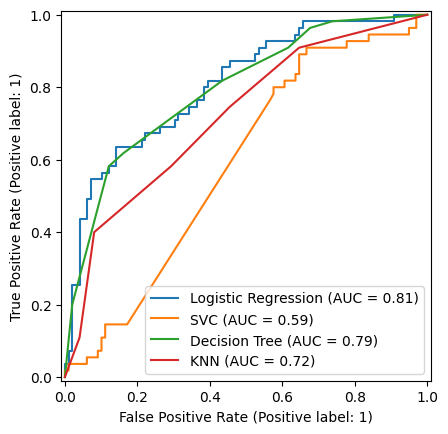

In [22]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# Объекты для отображения ROC-кривых
ax = plt.gca()
# Для модели логистической регрессии
lr_disp = RocCurveDisplay.from_estimator(model, X_test, Y_test, ax=ax, name='Logistic Regression')
# Для модели метода опорных векторов
svc_disp = RocCurveDisplay.from_estimator(best_model, X_test, Y_test, ax=ax, name='SVC')
# Для модели дерева решений
dt_disp = RocCurveDisplay.from_estimator(model_tree, X_test, Y_test, ax=ax, name='Decision Tree')
# Для модели K-ближайших соседей
knn_disp = RocCurveDisplay.from_estimator(model_knn, X_test, Y_test, ax=ax, name='KNN')